In [1]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
baseline_dir = "experiments/baseline_fh"
samplepairing_dir = "experiments/samplepairing_fh"
randomsamplepairing_dir = "experiments/randomsamplepairing_fh"

In [3]:
df_list = []
for exp in ['baseline', 'samplepairing', 'randomsamplepairing']:
    for cv in ['train', 'valid']:
        for metric in ['loss', 'error']:
            df = pd.read_csv("experiments/{}_fh/{}_{}.csv".format(exp, cv, metric))
            df['experiment'] = exp
            df['dataset'] = cv
            df['metric'] = metric
            
            df_list.append(df)

In [4]:
master_df = pd.concat(df_list)

In [5]:
g = master_df.groupby(['dataset', 'metric'])

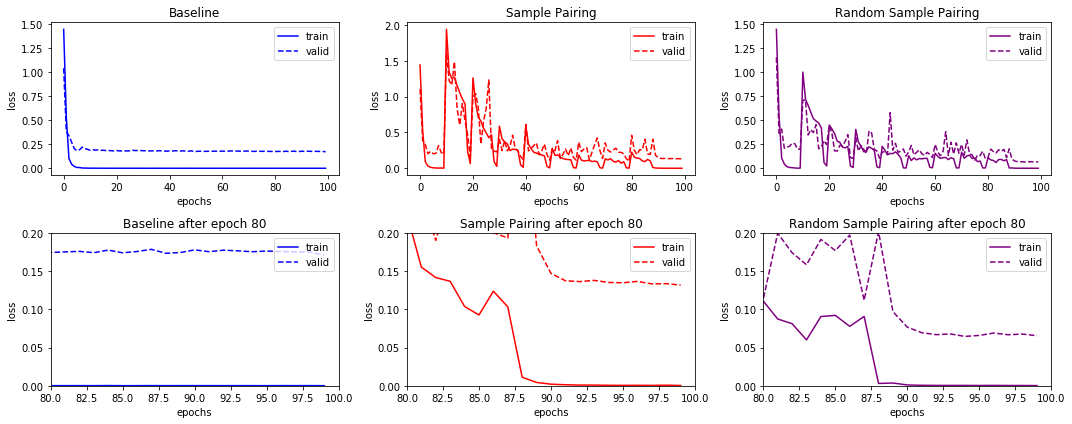

In [6]:
ls_dict = {
    'train': '-',
    'valid': '--'
}

fig, ax = plt.subplots(2, 3, figsize=(15, 6), facecolor='white')

baseline_df = master_df[lambda x: x.experiment == 'baseline'][lambda x: x.metric == 'loss']
g = baseline_df.groupby('dataset')

for label, data in g:
    ax[0][0].plot(data.Step, data.Value, label=label, linestyle=ls_dict[label], color='blue')
    ax[1][0].plot(data.Step, data.Value, label=label, linestyle=ls_dict[label], color='blue')
    
    ax[0][0].legend(loc='upper right')
    ax[1][0].legend(loc='upper right')
    
    ax[0][0].set_title("Baseline")
    ax[1][0].set_title("Baseline after epoch 80")
    
    ax[0][0].set_xlabel("epochs")
    ax[0][0].set_ylabel("loss")
    ax[1][0].set_xlabel("epochs")
    ax[1][0].set_ylabel("loss")
    
    ax[1][0].set_xlim(80, 100)
    ax[1][0].set_ylim(0, 0.2)
    
samplepairing_df = master_df[lambda x: x.experiment == 'samplepairing'][lambda x: x.metric == 'loss']
g = samplepairing_df.groupby('dataset')
for label, data in g:
    ax[0][1].plot(data.Step, data.Value, label=label, linestyle=ls_dict[label], color='red')
    ax[1][1].plot(data.Step, data.Value, label=label, linestyle=ls_dict[label], color='red')
    
    ax[0][1].legend(loc='upper right')
    ax[1][1].legend(loc='upper right')
    
    ax[0][1].set_title("Sample Pairing")
    ax[1][1].set_title("Sample Pairing after epoch 80")
    
    ax[0][1].set_xlabel("epochs")
    ax[0][1].set_ylabel("loss")
    ax[1][1].set_xlabel("epochs")
    ax[1][1].set_ylabel("loss")
    
    ax[1][1].set_xlim(80, 100)
    ax[1][1].set_ylim(0, 0.2)
    
randomsamplepairing_df = master_df[lambda x: x.experiment == 'randomsamplepairing'][lambda x: x.metric == 'loss']
g = randomsamplepairing_df.groupby('dataset')
for label, data in g:
    ax[0][2].plot(data.Step, data.Value, label=label, linestyle=ls_dict[label], color='purple')
    ax[1][2].plot(data.Step, data.Value, label=label, linestyle=ls_dict[label], color='purple')
    
    ax[0][2].legend(loc='upper right')
    ax[1][2].legend(loc='upper right')
    
    ax[0][2].set_title("Random Sample Pairing")
    ax[1][2].set_title("Random Sample Pairing after epoch 80")
    
    ax[0][2].set_xlabel("epochs")
    ax[0][2].set_ylabel("loss")
    ax[1][2].set_xlabel("epochs")
    ax[1][2].set_ylabel("loss")
    
    ax[1][2].set_xlim(80, 100)
    ax[1][2].set_ylim(0, 0.2)
    
plt.legend()
plt.tight_layout()
plt.show()

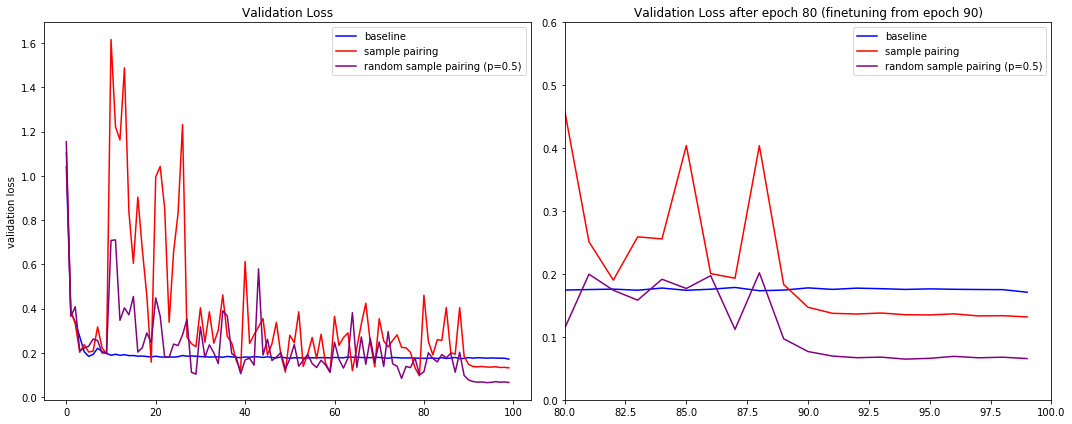

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), facecolor='white')
baseline_error = master_df[lambda x: x.experiment == 'baseline'][lambda x: x.dataset == 'valid'][lambda x: x.metric == 'loss']
samplepairing_error = master_df[lambda x: x.experiment == 'samplepairing'][lambda x: x.dataset == 'valid'][lambda x: x.metric == 'loss']
randomsamplepairing_error = master_df[lambda x: x.experiment == 'randomsamplepairing'][lambda x: x.dataset == 'valid'][lambda x: x.metric == 'loss']
ax[0].plot(baseline_error.Step, baseline_error.Value, c='blue', label="baseline")
ax[0].plot(samplepairing_error.Step, samplepairing_error.Value, c='red', label="sample pairing")
ax[0].plot(randomsamplepairing_error.Step, randomsamplepairing_error.Value, c='purple', label="random sample pairing (p=0.5)")

ax[1].plot(baseline_error.Step, baseline_error.Value, c='blue', label="baseline")
ax[1].plot(samplepairing_error.Step, samplepairing_error.Value, c='red', label="sample pairing")
ax[1].plot(randomsamplepairing_error.Step, randomsamplepairing_error.Value, c='purple', label="random sample pairing (p=0.5)")

ax[1].set_xlim(80, 100)
ax[1].set_ylim(0, 0.6)

ax[0].set_ylabel("validation loss")
ax[0].set_ylabel("validation loss")

ax[0].legend()
ax[1].legend()

ax[0].set_title("Validation Loss")
ax[1].set_title("Validation Loss after epoch 80 (finetuning from epoch 90)")

plt.tight_layout()
plt.show()

In [8]:
randomsamplepairing_test_error = 0.022
randomsamplepairing_test_loss = 0.06466
samplepairing_test_error = 0.038
samplepairing_test_loss = 0.09586
baseline_test_error = 0.038
baseline_test_loss = 0.17100 

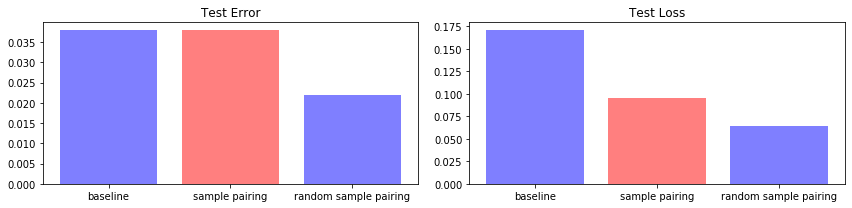

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3), facecolor='white')
ax[0].bar(['baseline', 'sample pairing', 'random sample pairing'], [baseline_test_error, samplepairing_test_error, randomsamplepairing_test_error], color=['blue', 'red'], alpha=0.5)
ax[0].set_title("Test Error")
ax[1].bar(['baseline', 'sample pairing', 'random sample pairing'], [baseline_test_loss, samplepairing_test_loss, randomsamplepairing_test_loss], color=['blue', 'red'], alpha=0.5)
ax[1].set_title("Test Loss")

plt.tight_layout()
plt.show()